In [1]:
from pathlib import Path
import cv2
import numpy as np
from IPython.display import Video

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Download video
#!curl -O https://www.bogotobogo.com/python/OpenCV_Python/images/mean_shift_tracking/slow_traffic_small.mp4

In [31]:
ROOT_DIR = Path('/home/rob/PycharmProjects/objectDetection')
DATA_DIR = ROOT_DIR /'data'
video_file = str(DATA_DIR / 'video' / 'slow_traffic_small.mp4')
video_out = str(DATA_DIR / 'video' / 'slow_traffic_small_out.mp4')

In [4]:
Video(video_file, embed=True)

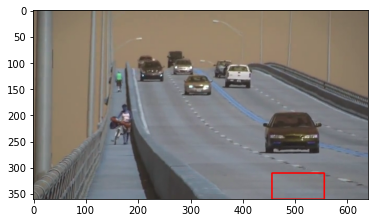

In [5]:
cap = cv2.VideoCapture(video_file)

# take first frame of the video
ret, frame = cap.read()
frame = frame[:,:,::-1]

# set up initial location of window
x, y, w, h = 300, 200, 100, 50 
track_window = (x, y, w, h)

# set up the ROI for tracking
roi = frame[y:y+h, x:x+w]
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60., 32.)), np.array((180., 255., 255.)))
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0,180])
cv2.normalize(roi_hist, roi_hist, 0,255, cv2.NORM_MINMAX)

# Setup the termination criteria, either iteration or move by at least 1 pt
term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

while(1):
    ret, frame = cap.read()
    
    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv], [0], roi_hist, [0,180], 1)
        
        # apply meanshift to get the new location
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)
        
        # Draw it on image
        x,y,w,h = track_window
        img2 = cv2.rectangle(frame, (x,y), (x+w, y+h), 255,2)
        plt.imshow(img2)
        
        k = cv2.waitKey(30) & 0xff
        if k == 27:
            break
    else:
        break

In [32]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
print(fourcc)

1983148141


## Lets get fancy

In [43]:
cap = cv2.VideoCapture(video_file)

# take first frame of the video
ret, frame = cap.read()
frame = frame

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
out = cv2.VideoWriter(video_out,fourcc, 20.0, (int(w), int(h)))

# set up initial location of window
x, y, w, h = 300, 200, 100, 50 
track_window = (x, y, w, h)

# set up the ROI for tracking
roi = frame[y:y+h, x:x+w]
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60., 32.)), np.array((180., 255., 255.)))
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0,180])
cv2.normalize(roi_hist, roi_hist, 0,255, cv2.NORM_MINMAX)

# Setup the termination criteria, either iteration or move by at least 1 pt
term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

while(cap.isOpened()):
    ret, frame = cap.read()
    
    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv], [0], roi_hist, [0,180], 1)
        
        # apply meanshift to get the new location
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)
        
        # Draw it on image
        x,y,w,h = track_window
        #print(x, y, w, h)
        img2 = cv2.rectangle(frame, (x,y), (x+w, y+h), 255,2)
        
        out.write(img2)
        #plt.imshow(img2)
        #plt.show()
        
    else:
        break
        
cap.release()
out.release()

In [46]:
Video(video_out, embed=True)